In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## 1. Audio Signal Basics
1.1 Create a python function that describes a pressure wave that is impinging on a microphone. Assume that the sound wave is a sustained, single note of frequency $f$ and amplitude $A$, and that $p(0) = 0$ (hint: which sinusoidal function, $sin(x)$ or $cos(x)$ is $0$, at $x=0$ ? ). This represents our *analog signal*. The function that you create is defined on a continuous domain.

In [18]:
def p(t, A, f): 
    """Describes a sound wave impinging a microphone 
    at times `t` (an array of times). The wave has an 
    amplitude `A` and a frequency `f`.
    
    Note: we only care about the wave at the microphone,
    which is why we do not have any spatial component to
    our wave.
    
    Parameters
    ----------
    t : numpy.ndarray, shape=(N,)
        The times at which we want to evaluate the sound wave
    
    A : float
        The wave's amplitude (a measure of pressure)
    
    f : float
        The wave's frequency (measured in Hz - oscillations per second)
    
    Returns
    -------
    numpy.ndarray, shape=(N,)
        The pressure at the microphone at times `t`"""
    # A * sin(f * t)
    cycles = 2 * np.pi * f * t
    return A * np.sin(cycles)

1.2. The function that you just wrote can be thought of as a representation of the analog signal that is recorded by our microphone: it represents the continuous fluctuations in voltage that is produced by the oscillating magnet in our microphone. We can "sample" this analog signal by evaluating the function at specific times. 

Sample the analog signal of a sound wave for a $C_{4}$-note (261.63 Hz) played for 3 seconds. Use the standard audio sampling rate (44100 Hz). That is, evaluate your function at regularly-spaced times according to this sampling rate and time duration. You may want to use [`numpy.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to generate the times at which you will sample.

In [33]:
times = np.linspace(0, .01, num=int(44100 * .01) + 1)
wave = p(times, 5, 261.63)

1.3 Plot 3 periods of the sound wave, with the x-axis labeled with units.

Pseudo code for plotting:

```python
fig, ax = plt.subplots()
t = # array/sequence of times
amp = # array/sequence of samples
ax.plot(t, amp, marker='x')
ax.set_xlabel("t (seconds)");
```

Text(0.5, 0, 't (seconds)')

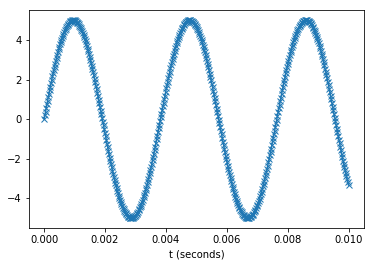

In [35]:
fig, ax = plt.subplots()
#print(wave)
ax.plot(times, wave, marker='x')
ax.set_xlabel("t (seconds)")

Play the 3-second audio using

```python
from IPython.display import Audio
Audio(data, rate=???)
```
Note that `Audio` automatically normalized the volume according to its slider, so the amplitude that we set will have no effect. Adjusting the amplitude would typically manifest as a change in volume!

In [29]:
from IPython.display import Audio
Audio(wave, rate=44100)

1.4 Plot the wave form of the C-major triad for 0.64 seconds. This should be the sum of three sine waves of equal amplitudes (1) of the following respective frequencies:
 - 523.25 Hz (C)
 - 659.25 Hz (E)
 - 783.99 Hz (G)
 
Here is the pseudocode for plotting

```python
fig, ax = plt.subplots()
ax.plot(time, amps)
ax.set_xlabel("t (seconds)")
ax.set_title("Major Triad");
```

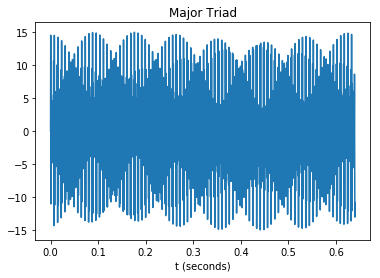

In [41]:
times = np.linspace(0, .64, num=int(44100 * .64) + 1)
C = p(times, 5, 523.25)
E = p(times, 5, 659.25)
G = p(times, 5, 783.99)

fig, ax = plt.subplots()
ax.plot(times, C + E + G)
ax.set_xlabel("t (seconds)")
ax.set_title("Major Triad");

Play the major triad audio clip for 3 seconds.

In [46]:
from IPython.display import Audio
times = np.linspace(0, 3, num=int(44100 * 3) + 1)
C = p(times, 5, 523.25)
E = p(times, 5, 659.25)
G = p(times, 5, 783.99)
Audio(C + E + G, rate=44100)

Isn't it beautiful? 😛
Notice how messy looking the waveform is. It is wholly unintuitive to look at the data in this way, even though it is only comprised of 3 simple notes. In the next section, we will see that we can convert this *amplitude-time* data into *amplitude-frequency* data, which is much more useful for us! This conversion process is known as a **Fourier Transform**. 

Now, define a function that describes a pressure wave for **noise** (use `numpy.random.rand` to generate samples randomly between 0 and 1). Plot some of its "wave form".

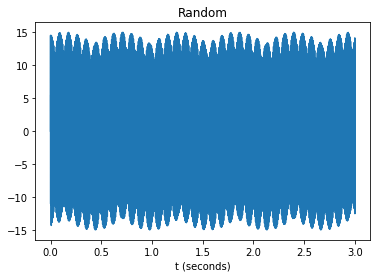

In [48]:
random = np.random.rand(44100 * 3)
fig, ax = plt.subplots()
ax.plot(times, C + E + G)
ax.set_xlabel("t (seconds)")
ax.set_title("Random");

Now play 3 seconds of noise!

In [50]:
Audio(random, rate=44100)